# 손실 함수
- 신경망 학습에서 최적의 매개변수 값을 탐색하는 데 사용하는 지표는 **손실 함수(loss function)** 이다. 일반적으로 
    - 오차제곱합(Sum of Squared Error, SSE)
    - 교차 엔트로피 오차(Cross Entropy Error, CEE)
    를 사용한다.
    

## 오차제곱합

<center>
    $E = \frac{1}{2}\Sigma_{k}^{}(y_k-t_k)^{2}$
</center>

$y_k$ : 신경망의 출력(신경망이 추정한 값)\
$t_k$ : 정답 레이블

In [1]:
import numpy as np

In [2]:
# EX. 0 ~ 9까지의 예측 확률과 레이블

In [3]:
def sum_squares_error(y, t) :
    return 0.5*np.sum((y-t)**2)

In [4]:
# ex 1. 2일 확률이 0.6으로 가장 높다고 예측

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

sum_squares_error(y, t)

0.09750000000000003

In [5]:
# ex 2. 7일 확률이 0.6으로 가장 높다고 예측

y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

sum_squares_error(y, t)

0.5975

ex.1은 정답이 '2'이고 신경망의 출력도 '2'에서 가장 높은 경우이다
> SSE가 0.0975로 낮은 값

ex.2은 정답이 '2'이지만 신경망의 출력은 '7'에서 가장 높은 경우이다
> SSE가 0.5975로 높은 값

## 교차 엔트로피 오차

<center>
    $E = -\Sigma_{k}t_k\text{log}y_k$
</center>

$y_k$ : 신경망의 출력(신경망이 추정한 값)\
$t_k$ : 정답 레이블

In [6]:
def cross_entropy_error(y, t) :
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [7]:
# ex 1. 2일 확률이 0.6으로 가장 높다고 예측

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

cross_entropy_error(y, t)

0.510825457099338

In [8]:
# ex 2. 7일 확률이 0.6으로 가장 높다고 예측

y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

cross_entropy_error(y, t)

2.302584092994546

## 미니배치 학습

기계학습 문제는 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾는 것이다. 즉, 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 한다.

이때까지는 데이터 하나에 대한 손실 함수를 고려했지만 지금부터는 N개의 훈련 데이터에 대한 손실 함수를 탐색

**CCE**
<center>
    $E = -\frac{1}{N}\Sigma_{n}\Sigma_{k}t_{nk}\text{log}y_{nk}$
</center>

N개의 데이터의 손실 함수의 산술평균

현실적으로 데이터의 수가 많은 경우 모든 데이터를 대상으로 손실 함수의 값을 구하는 데는 많은 시간이 걸린다.
> 데이터 일부를 추려 전체의 **근사치**로 이용

신경망에서도 일부만 골라 학습을 수행하는데 이를 **미니배치**라고 한다.



In [9]:
import sys, os 
sys.path.append(os.pardir)
import numpy as np 
from dataset.mnist import load_mnist 

(X_train, t_train), (X_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

print(X_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


**무작위로 10장 추출**

In [10]:
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[batch_mask]
t_batch = t_train[batch_mask]

## 배치용 교차 엔트로피 오차 구현 

In [11]:
def cross_entropy_error(y, t) : 
    if y.ndim == 1 : 
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

정답 레이블이 원-핫 인코딩이 아니라 숫자 레이블로 주어진 경우 : 

In [12]:
def cross_entropy_error(y, t) : 
    if y.ndim == 1 : 
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# 수치 미분 

## 수치 미분 예

In [13]:
def numerical_diff(f, x) : 
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [14]:
# ex. y = 0.01x^2 + 0.1x
def function_1(x) :
    return 0.01*x**2 + 0.1*x

In [15]:
import numpy as np 
import matplotlib.pylab as plt 

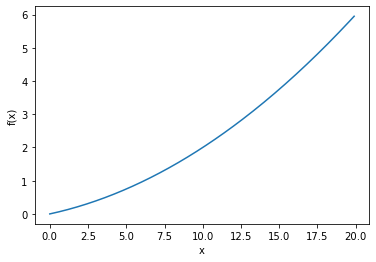

In [16]:
x = np.arange(0, 20, 0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [17]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


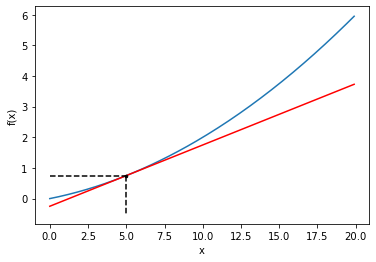

In [18]:
def tangent_line1(x) : 
    return numerical_diff(function_1, 5) * (x-5) + function_1(5)

x = np.arange(0, 20, 0.1)
y = function_1(x)

 
x_ = np.arange(0, 20, 0.1)
y_ = tangent_line1(x_)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x_, y_, color = 'red')
plt.plot(5, function_1(5), markersize = 5, marker = '.', color = 'black')
plt.plot([0,5], [function_1(5), function_1(5)], 'k--')
plt.plot([5,5], [function_1(5), -0.5], 'k--')
plt.show()

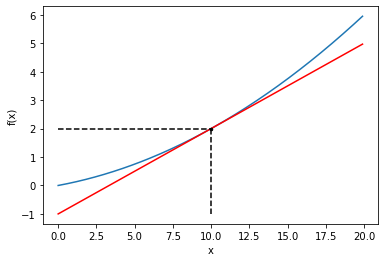

In [19]:
def tangent_line2(x) : 
    return numerical_diff(function_1, 10) * (x-10) + function_1(10)

x = np.arange(0, 20, 0.1)
y = function_1(x)

 
x_ = np.arange(0, 20, 0.1)
y_ = tangent_line2(x_)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x_, y_, color = 'red')
plt.plot(10, function_1(10), markersize = 5, marker = '.', color = 'black')
plt.plot([0,10], [function_1(10), function_1(10)], 'k--')
plt.plot([10,10], [function_1(10), -1], 'k--')
plt.show()

## 편미분 

$f(x_0, x_1)=x_0^2+x_1^2$

In [20]:
def function_2(x) : # 이 때는 x가 벡터
    return x[0] ** 2 + x[1] ** 2 
    # return np.sum(x ** 2)도 가능
    

$x_0$ = 3, $x_1$ = 4일 때 $x_0$에 대한 편미분 $\frac{\partial{f}}{\partial{x_0}}$ 구하기

In [21]:
def function_tmp1(x0) : 
    return x0*x0 + 4.0**2.0

In [22]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

# 기울기
- 앞에서는 개별 변수에 대한 편미분을 따로 계산했음
- 모든 변수의 편미분을 벡터로 표현하면 해당 좌표에서의 **기울기**로 정의할 수 있음 


ex. $x_0 = 3, x_1 = 4$일 때 $(\frac{\partial{f}}{\partial{x_0}},\frac{\partial{f}}{\partial{x_1}})$를 계산하면 해당 좌표에서 기울기가 된다.

기울기 구현 예시

In [23]:
def numerical_gradient(f, x) : # x는 벡터
    h = 1e-4
    grad = np.zeros_like(x) # 각각의 변수에 대해서 편미분하기 때문에 x와 shape가 같은 벡터 생성
    
    for idx in range(x.size) : # 모든 변수에 대해서
        tmp_val = x[idx]
        
        # f(x+h)
        x[idx] = tmp_val + h 
        fxh1 = f(x)
        
        # f(x-h)
        x[idx] = tmp_val - h 
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [24]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [25]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [26]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

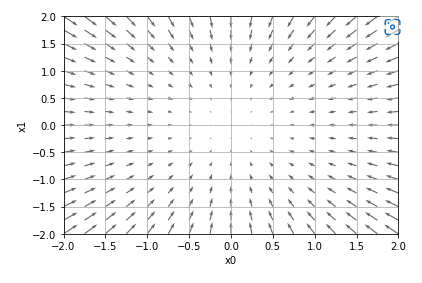

# 경사하강법(Gradient Descent)

- 손실 함수를 최소화하기 위해 현 위치에서 기울어진 방향으로 일정 거리만큼 이동

- 이동한 곳에서도 기울기를 구하고 기울어진 방향으로 이동하는 것을 반복

<center>
    $x_0 = x_0- \eta \dfrac{\partial{f}}{\partial{x_0}}$  
</center>


<center>
    $x_1 = x_1- \eta \dfrac{\partial{f}}{\partial{x_1}}$
</center>


In [27]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100) : 
    x = init_x
    
    for i in range(step_num) : 
        grad = numerical_gradient(f, x) 
        x -= lr * grad
    
    return x

$f(x_0, x_1) = x_0^2 + x_1^2$**의 최솟값 구하기**

In [28]:
def function_2(x) : 
    return x[0]**2 + x[1]**2

In [29]:
init_x = np.array([3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([6.11110793e-10, 8.14814391e-10])

## 신경망에서의 기울기

신경망에서도 기울기를 구해야 한다.
> 여기서 기울기는 가중치 매개변수에 대한 손실 함수의 기울기를 의미

$W$에 대해 경사는 $$\frac{\partial{L}}{\partial{W}}$$로 나타낼 수 있다.

$$W = \begin{pmatrix}
w_{11} & w_{12} & w_{13}\\
w_{21} & w_{22} & w_{23}
\end{pmatrix}$$

$$\dfrac{\partial{L}}{\partial{W}} = \begin{pmatrix}
\frac{\partial{L}}{\partial{w_{11}}} & 
\frac{\partial{L}}{\partial{w_{12}}} & 
\frac{\partial{L}}{\partial{w_{13}}} \\
\frac{\partial{L}}{\partial{w_{21}}} &
\frac{\partial{L}}{\partial{w_{22}}} &
\frac{\partial{L}}{\partial{w_{23}}}
\end{pmatrix}$$

## 간단한 신경망에서 기울기를 구하는 코드 구현 

### simplenet

In [30]:
import sys, os 
sys.path.append(os.pardir)

import numpy as np 
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet : 
    def __init__(self) : 
        self.W = np.random.randn(2, 3)
        
    def predict(self, x) :
        return np.dot(x, self.W) 
    
    def loss(self, x, t) :
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [31]:
net = simpleNet()

In [32]:
# 가중치 매개변수
print(net.W)

[[ 0.41831216  1.3411954  -0.12993634]
 [-0.21496684 -0.30179863 -0.24648703]]


In [33]:
# 입력값
x = np.array([0.6, 0.9])

# 출력값
p = net.predict(x)
print(p)

[ 0.05751714  0.53309848 -0.29980013]


In [34]:
# 최댓값의 인덱스
np.argmax(p)

1

In [35]:
# 정답 레이블 
t = np.array([0,0,1])
net.loss(x, t)

1.5538116505820083

###  기울기 계산

net.W를 인수로 받아서 손실 함수를 계산하는 새로운 함수 f를 정의하고 이 함수를 numerical_gradient(f, x)에 넘긴다.

In [36]:
def f(W) : 
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.18135099  0.29178455 -0.47313554]
 [ 0.27202649  0.43767682 -0.70970331]]


dW는 numerical_gradient(f, net.W)의 결과로 각 가중치별 기울기를 계산
> 예를 들어, $\frac{\partial{L}}{\partial{w_{11}}}$은 대략 0.366인데, 이는 $w_{11}$을 $h$만큼 늘리면 손실 함수의 값은 0.366$h$만큼 증가한다는 의미이기 때문에 음의 방향으로 갱신해야 한다. 반대로  $w_{13}$을 $h$만큼 늘리면 손실 함수의 값은 0.522$h$만큼 감소한다는 의미이기 때문에 양의 방향으로 갱신해야 한다.

# 학습 알고리즘 구현 

## 신경망 학습의 절차 

0. 전제 
> 신경망에는 적응 가능한 가중치와 편향이 있고, 이 값들을 훈련 데이터에 적응하도록 조정하는 과정을 **학습**이라고 한다. 신경망 학습은 아래의 4단계를 수행한다.

1. 미니배치
> 훈련 데이터 중 일부를 무작위로 가져온다. 이것을 미니배치라고 하며, 그 미니배치의 손실값을 줄이는 것이 목표이다.

2. 기울기 산출
> 미니배치의 손실함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 계산한다. 기울기는 손실 함수의 값을 작게하는 방향을 제시한다.

3. 매개변수 갱신
> 가중치 매개변수를 기울기 방향으로 아주 조금 갱신

4. 반복
> 1~3을 반복

경사하강법으로 매개변수를 갱신하는데, 미니배치로 데이터를 무작위로 선정하기 때문에 **확률적 경사 하강법(Stochastic Gradient Descent, SGD)** 이라고 한다.

## 2층 신경망 클래스 구현 

In [37]:
import sys, os 
sys.path.append(os.pardir)
from common.functions import * 
from common.gradient import numerical_gradient 

# 2층 신경망 클래스 
class TwoLayerNet :
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01) : 
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x) : 
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1 
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2 
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t) :
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t) : 
        y = self.predict(x)
        y = np.argmax(y, axis = 1) 
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t) / float(len(x))
        
        return accuracy 
    
    def numerical_gradient(self, x, t) : 
        loss_W = lambda W : self.loss(x, t) 
        
        grads = {} 
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads 

In [38]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
print((net.params['W1'].shape))
print((net.params['b1'].shape))
print((net.params['W2'].shape))
print((net.params['b2'].shape))

(784, 100)
(100,)
(100, 10)
(10,)


## 미니배치 학습 구현 

In [ ]:
import numpy as np 
from dataset.mnist import load_mnist 
from two_layer_net import TwoLayerNet
from common.functions import * 

(X_train, t_train), (X_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []

# 하이퍼 파라미터 
iters_num = 10000
train_size = X_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size = 784, 
                      hidden_size = 100,
                      output_size = 10,)

for i in range(iters_num) : 
    # 미니배치 생성
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(X_batch, t_batch)
    
    # 매개변수 갱신 
    for key in ('W1', 'b1', 'W2', 'b2') : 
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록 
    loss = network.loss(X_batch, t_batch)
    train_loss_list.append(loss)

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(train_loss_list)